In [38]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [39]:
data_path = "C:/Users/Gary/Desktop/jptnotebook/lung_cancer.csv"
row_data = pd.read_csv(data_path)
data = row_data.drop(row_data.columns[[0, 1]], axis=1)
print(data)

      Diagnosis  Age  Smokes  Smokes_years  Smokes_packs_year  AreaQ  Alkhol  \
0             1   35       3           0.0                0.0      5       4   
1             1   27      20           0.0                0.0      2       5   
2             1   30       0           0.0                0.0      5       2   
3             1   28       0          37.0               37.0      8       1   
4             1   68       4           0.0                0.0      5       6   
...         ...  ...     ...           ...                ...    ...     ...   
1293          1   26      13           0.0                0.0      6       1   
1294          0   77      20           0.0                0.0      5       4   
1295          1   75      15           0.0                0.0      3       5   
1296          1   43      30           7.0                1.6      3       8   
1297          0   51      25           0.0                0.0      9       0   

      family history  Result  
0       

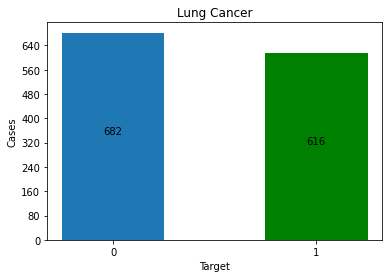

In [52]:
r0, r1 = 0, 0
for i in data['Result']:
    if i == 0:
        r0 += 1
    elif i ==1:
        r1 += 1
b_y = [r0, r1]

A = plt.bar([0, 1], b_y, width=0.5)
A[1].set_color('g')
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))
def createLabels(data):                   # 自定義函數，為引用plusone團隊
    for item in data:
        height = item.get_height()
        plt.text(
            item.get_x()+item.get_width()/2., 
            height*0.5, 
            '%d' % int(height),
            ha = "center",
            va = "bottom",
        )
createLabels(A)
plt.xlabel('Target')
plt.ylabel('Cases')
plt.title('Lung Cancer')
plt.savefig("C:/Users/Gary/Desktop/final_con.png")
plt.show()

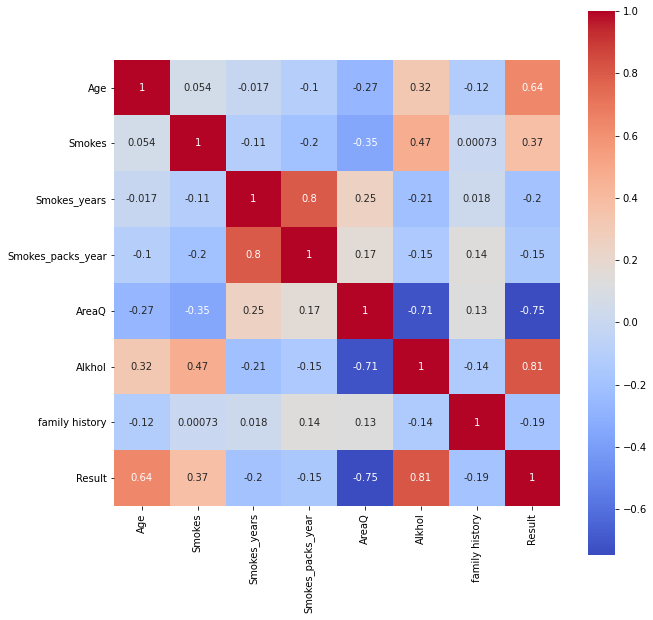

In [26]:
features_mean= list(data.columns[1:])
plt.figure(figsize=(10,10))
sns.heatmap(data[features_mean].corr(), annot=True, square=True, cmap='coolwarm')
# plt.savefig("C:/Users/Gary/Desktop/final.png")
plt.show()

In [19]:
x = data[data.columns[:-1]]
y = data[data.columns[-1]]
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=1, test_size=0.3)
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [20]:
knn_tpre = knn.predict(X_test)
knn_mat = confusion_matrix(y_test, knn_tpre)
print(knn_mat)
print(classification_report(y_test, knn_tpre))

[[205   0]
 [  0 185]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       205
           1       1.00      1.00      1.00       185

    accuracy                           1.00       390
   macro avg       1.00      1.00      1.00       390
weighted avg       1.00      1.00      1.00       390



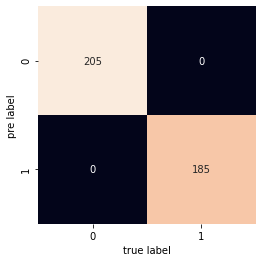

In [21]:
sns.heatmap(knn_mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('pre label')
# plt.savefig("C:/Users/Gary/Desktop/final_mat.png")
plt.show()